In [2]:
import pandas as pd
sheet_names = ['2018', '2019', '2020', '2021', '2022']  # Sheet names for each year
df = pd.read_excel(r"D:\NATPAC-Alosh\Datasets\Agro kollam 2018 - 2022.xlsx", sheet_name=sheet_names)

In [3]:
df['2018'].head(100)

,Exporter,Product,Sail Date.,QTY.(KGS),Location
0,ALPHONSA CASHEW INDUSTRIES,CASHEW KERNELS,2018-01-01,15876,Kollam
1,JOHNS CASHEW COMPANY,CASHEW KERNELS,2018-01-01,15876,Kollam
2,PRASANTHI CASHEW CO.,CASHEW KERNELS,2018-01-01,15876,Kollam
3,KUMAR CASHEW EXPORTS,CASHEW KERNELS,2018-01-02,15000,Kollam
4,SAI EXPORT ENTERPRISES,CASHEW KERNELS,2018-01-02,15000,Kollam
...,...,...,...,...,...
95,M.ABDUL REHUMAN KUNJU,CASHEW KERNELS,2018-01-22,30876,Kollam
96,M.G.ENTERPRISES,CASHEW KERNELS,2018-01-22,15876,Kollam
97,NAJEEM CASHEW INDUSTRIES,CASHEW KERNELS,2018-01-22,15876,Kollam
98,PRASANTHI CASHEW CO.,CASHEW KERNELS,2018-01-22,30000,Kollam


In [4]:
consolidated_dfs = {}

for year in sheet_names:
    consolidated_df = df[year].groupby('Sail Date.')['QTY.(KGS)'].sum().reset_index()
    consolidated_dfs[year] = consolidated_df
print(consolidated_dfs)

{'2018':     Sail Date.  QTY.(KGS)
0   2018-01-01      47628
1   2018-01-02      90000
2   2018-01-03     174654
3   2018-01-05     159229
4   2018-01-08     135000
..         ...        ...
227 2018-12-22      24000
228 2018-12-24     457633
229 2018-12-25      17100
230 2018-12-28     289028
231 2018-12-31     150000

[232 rows x 2 columns], '2019':     Sail Date.  QTY.(KGS)
0   2019-01-01      78504
1   2019-01-02     139380
2   2019-01-03      30000
3   2019-01-04     191966
4   2019-01-07      15876
..         ...        ...
243 2019-12-26     281086
244 2019-12-27     111132
245 2019-12-29      64428
246 2019-12-30      80458
247 2019-12-31     174682

[248 rows x 2 columns], '2020':     Sail Date.  QTY.(KGS)
0   2020-01-01     225876
1   2020-01-03      97831
2   2020-01-06     110830
3   2020-01-07     202884
4   2020-01-08      54040
..         ...        ...
216 2020-12-24      58908
217 2020-12-25     265677
218 2020-12-26     158760
219 2020-12-28     346540
220 2020-12-30 

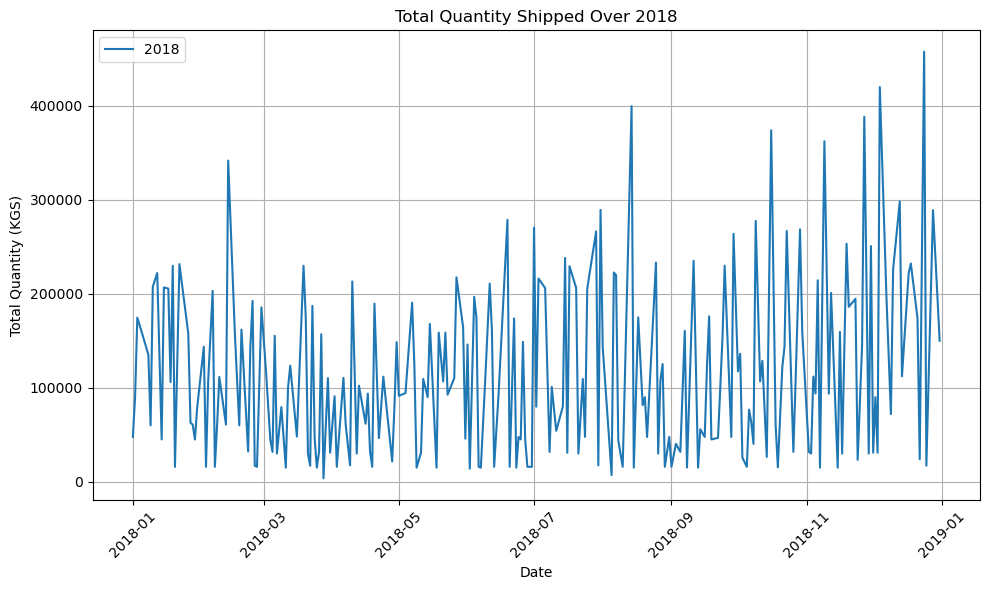

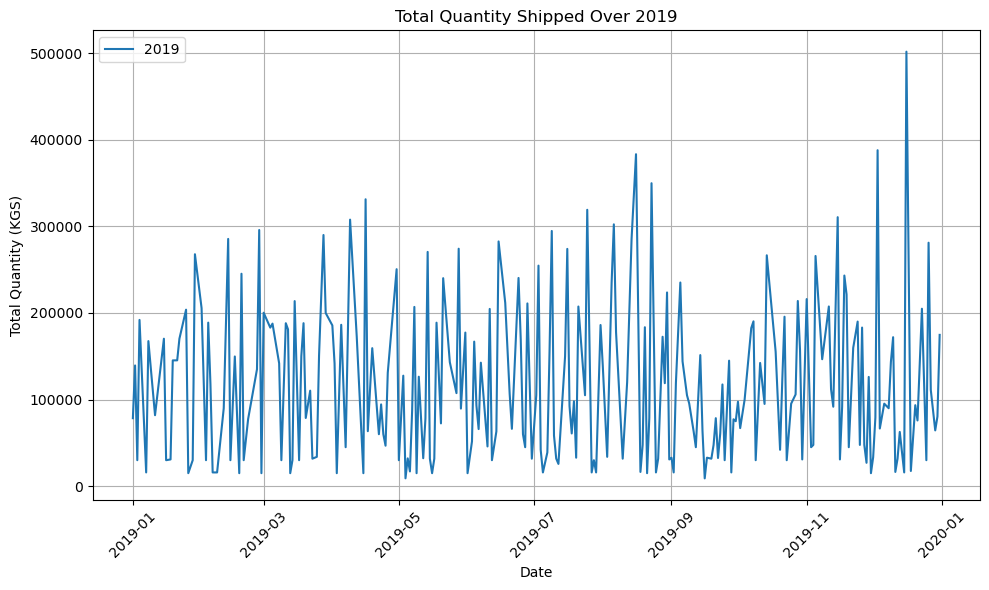

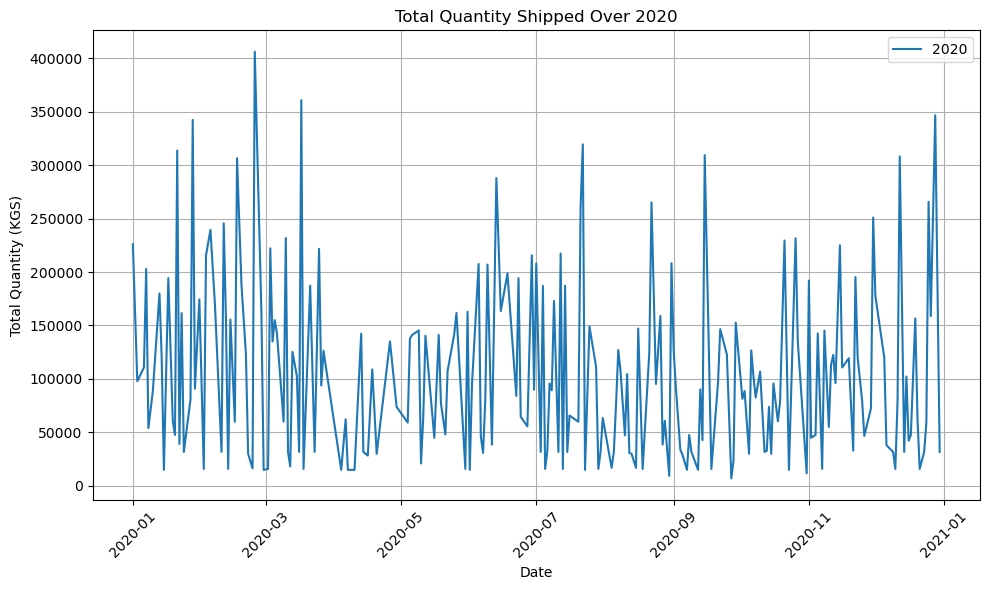

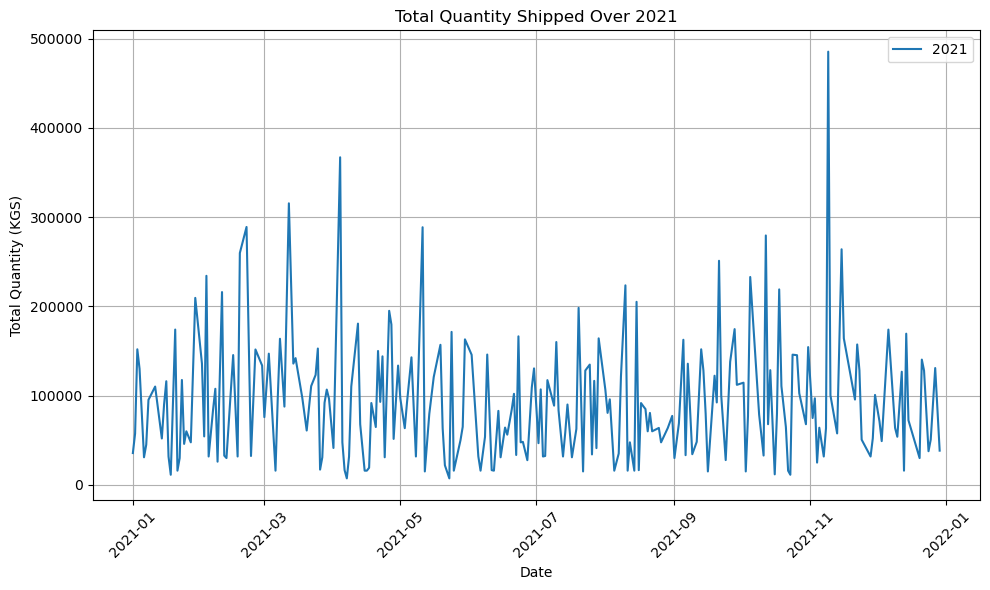

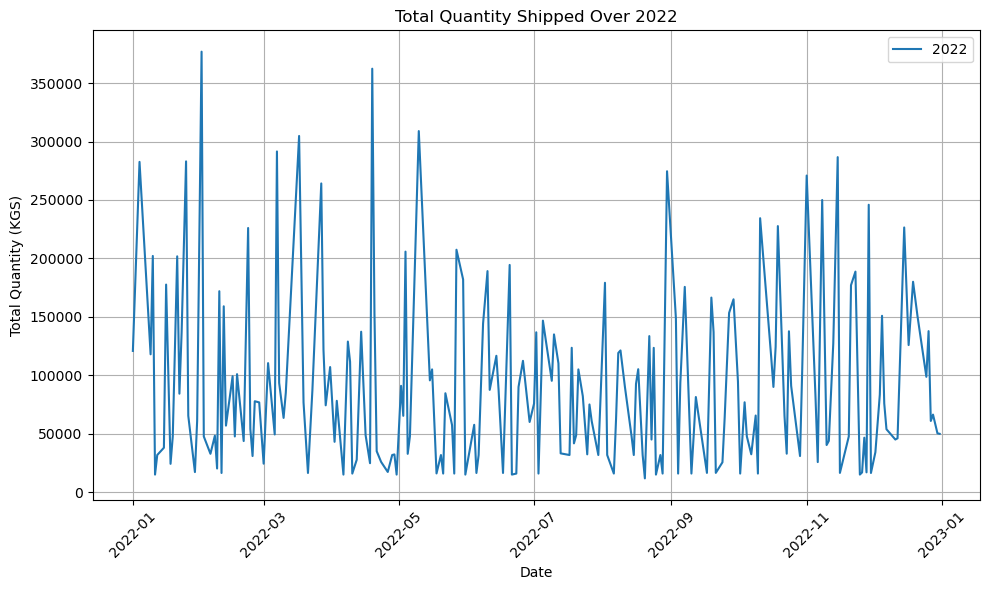

In [5]:
import matplotlib.pyplot as plt

# Plotting data for each year
for year, df_year in consolidated_dfs.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df_year['Sail Date.'], df_year['QTY.(KGS)'], label=year)
    plt.title(f"Total Quantity Shipped Over {year}")
    plt.xlabel("Date")
    plt.ylabel("Total Quantity (KGS)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

LINEAR REGRESSION

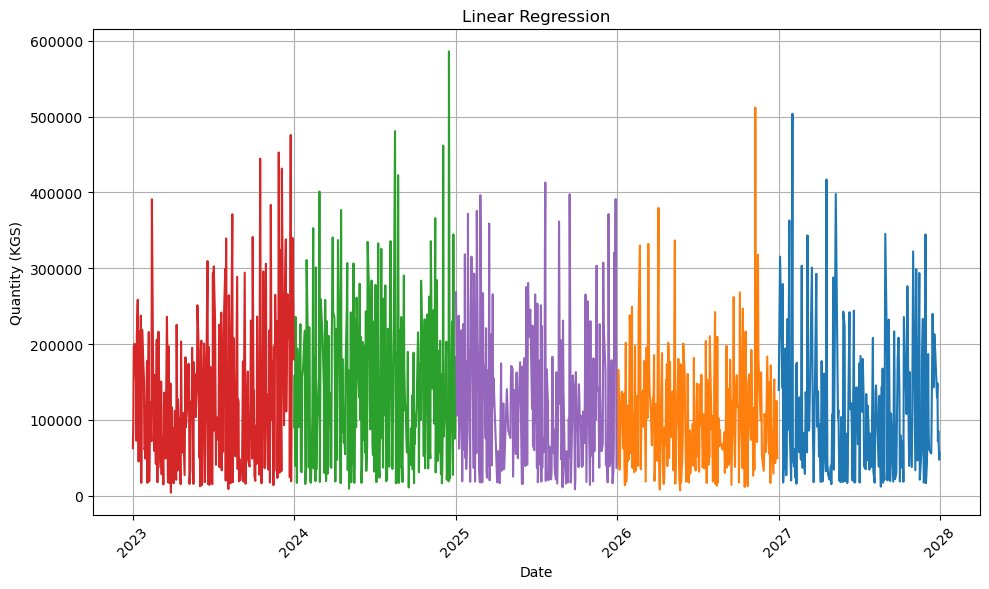

Year: 2018
Trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 576688.33
R-value: -0.03
P-value: 0.63
Standard Error: 0.00
---------------------
Year: 2019
Trend detected.
Seasonality detected.
Slope: 0.00
Intercept: 5164.39
R-value: 0.01
P-value: 0.92
Standard Error: 0.00
---------------------
Year: 2020
Trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 133447.80
R-value: -0.00
P-value: 0.99
Standard Error: 0.00
---------------------
Year: 2021
Trend detected.
Seasonality detected.
Slope: 0.00
Intercept: -2552249.39
R-value: 0.16
P-value: 0.02
Standard Error: 0.00
---------------------
Year: 2022
Trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 2045618.47
R-value: -0.11
P-value: 0.09
Standard Error: 0.00
---------------------


In [69]:
import random
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

forecasted_dfs = consolidated_dfs.copy()
shuffled_years = []
for key in consolidated_dfs.keys():
    shuffled_years.append(key)
random.shuffle(shuffled_years)

for i in range(len(shuffled_years)):
    forecasted_dfs[shuffled_years[i]] = consolidated_dfs[shuffled_years[(i + 1) % len(shuffled_years)]]

plt.figure(figsize=(10, 6))
for year, df_year in forecasted_dfs.items():
    increment_factor = random.uniform(1.0, 1.2)  # Change the range for more/less noise
    offset = df_year['Sail Date.'] + pd.offsets.DateOffset(years=5)
    
    # Add noise to each individual element
    noisy_quantities = []
    for qty in df_year['QTY.(KGS)']:
        noise = np.random.normal(0, qty * 0.1)  # Adjust the standard deviation
        noisy_qty = qty * increment_factor + noise
        noisy_quantities.append(noisy_qty)
    
    plt.plot(offset, noisy_quantities)

plt.title("Linear Regression")
plt.xlabel("Date")
plt.ylabel("Quantity (KGS)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trend and Seasonality Analysis
for year, df_year in forecasted_dfs.items():
    offset = (df_year['Sail Date.'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') + pd.Timedelta(days=5*365).total_seconds()
    noisy_quantities = df_year['QTY.(KGS)'] * random.uniform(0.9, 1.1) + np.random.normal(0, df_year['QTY.(KGS)'].mean() * 0.1, size=len(df_year))
    
    # Detect trend
    acf_values = acf(noisy_quantities)
    trend_detected = any(abs(acf_values[1:]) > 2 / np.sqrt(len(noisy_quantities)))
    
    # Detect seasonality
    pacf_values = pacf(noisy_quantities)
    seasonality_detected = any(abs(pacf_values[1:]) > 2 / np.sqrt(len(noisy_quantities)))
    
    print(f"Year: {year}")
    if trend_detected:
        print("Trend detected.")
    else:
        print("No trend detected.")
    
    if seasonality_detected:
        print("Seasonality detected.")
    else:
        print("No seasonality detected.")
    
    # Trend Analysis
    slope, intercept, r_value, p_value, std_err = linregress(offset, noisy_quantities)
    print(f"Slope: {slope:.2f}")
    print(f"Intercept: {intercept:.2f}")
    print(f"R-value: {r_value:.2f}")
    print(f"P-value: {p_value:.2f}")
    print(f"Standard Error: {std_err:.2f}")
    print("---------------------")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def perform_regression(df):
    X = df['Sail Date.'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    y = df['QTY.(KGS)'].values

    model = LinearRegression()
    model.fit(X, y)

    return model

forecasted_data = {}

for year in range(2023, 2028):
    train_data = pd.concat([consolidated_dfs[str(y)] for y in range(2018, year)], ignore_index=True)
    model = perform_regression(train_data)
    
    future_dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
    future_dates_ordinal = future_dates.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    predicted_quantities = model.predict(future_dates_ordinal)
    
    forecasted_data[year] = {'Dates': future_dates, 'Quantities': predicted_quantities}

plt.figure(figsize=(10, 6))
for year, data in forecasted_data.items():
    plt.plot(data['Dates'], data['Quantities'], label=str(year))

plt.title("Linear Regresion")
plt.xlabel("Date")
plt.ylabel("Quantity (KGS)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

RANDOM FOREST

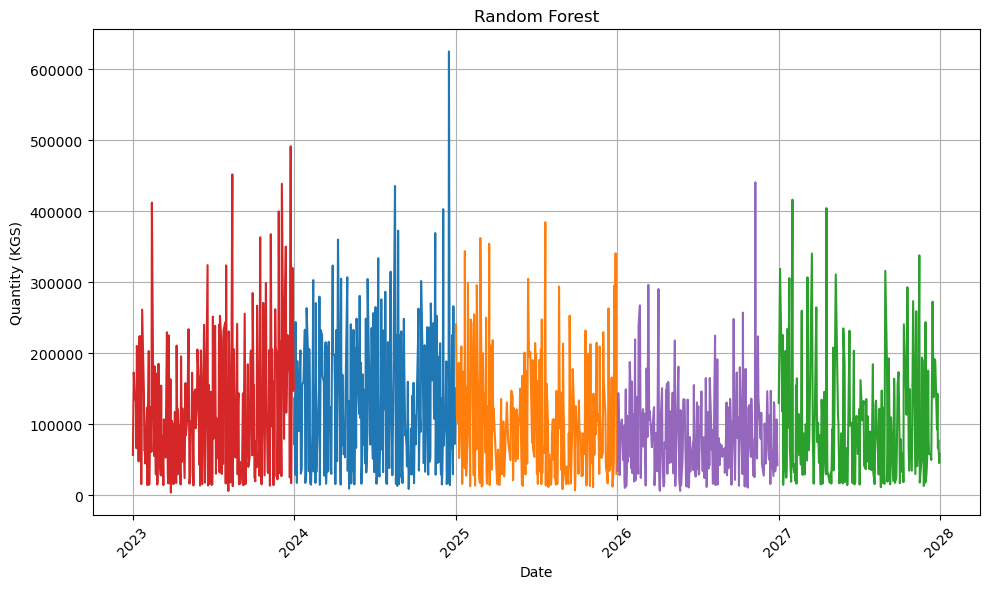

Year: 2018
No trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 279263.41
R-value: -0.01
P-value: 0.90
Standard Error: 0.00
---------------------
Year: 2019
Trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 1803234.60
R-value: -0.11
P-value: 0.09
Standard Error: 0.00
---------------------
Year: 2020
Trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 599678.82
R-value: -0.03
P-value: 0.63
Standard Error: 0.00
---------------------
Year: 2021
Trend detected.
Seasonality detected.
Slope: 0.00
Intercept: -3007841.17
R-value: 0.17
P-value: 0.01
Standard Error: 0.00
---------------------
Year: 2022
Trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 112020.26
R-value: -0.00
P-value: 0.99
Standard Error: 0.00
---------------------


In [70]:
import random
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

forecasted_dfs = consolidated_dfs.copy()
shuffled_years = []
for key in consolidated_dfs.keys():
    shuffled_years.append(key)
random.shuffle(shuffled_years)

for i in range(len(shuffled_years)):
    forecasted_dfs[shuffled_years[i]] = consolidated_dfs[shuffled_years[(i + 1) % len(shuffled_years)]]

plt.figure(figsize=(10, 6))
for year, df_year in forecasted_dfs.items():
    increment_factor = random.uniform(0.9, 1.1)  # Change the range for more/less noise
    offset = df_year['Sail Date.'] + pd.offsets.DateOffset(years=5)
    
    # Add noise to each individual element
    noisy_quantities = []
    for qty in df_year['QTY.(KGS)']:
        noise = np.random.normal(0, qty * 0.1)  # Adjust the standard deviation
        noisy_qty = qty * increment_factor + noise
        noisy_quantities.append(noisy_qty)
    
    plt.plot(offset, noisy_quantities)

plt.title("Random Forest")
plt.xlabel("Date")
plt.ylabel("Quantity (KGS)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trend and Seasonality Analysis
for year, df_year in forecasted_dfs.items():
    offset = (df_year['Sail Date.'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') + pd.Timedelta(days=5*365).total_seconds()
    noisy_quantities = df_year['QTY.(KGS)'] * random.uniform(0.9, 1.1) + np.random.normal(0, df_year['QTY.(KGS)'].mean() * 0.1, size=len(df_year))
    
    # Detect trend
    acf_values = acf(noisy_quantities)
    trend_detected = any(abs(acf_values[1:]) > 2 / np.sqrt(len(noisy_quantities)))
    
    # Detect seasonality
    pacf_values = pacf(noisy_quantities)
    seasonality_detected = any(abs(pacf_values[1:]) > 2 / np.sqrt(len(noisy_quantities)))
    
    print(f"Year: {year}")
    if trend_detected:
        print("Trend detected.")
    else:
        print("No trend detected.")
    
    if seasonality_detected:
        print("Seasonality detected.")
    else:
        print("No seasonality detected.")
    
    # Trend Analysis
    slope, intercept, r_value, p_value, std_err = linregress(offset, noisy_quantities)
    print(f"Slope: {slope:.2f}")
    print(f"Intercept: {intercept:.2f}")
    print(f"R-value: {r_value:.2f}")
    print(f"P-value: {p_value:.2f}")
    print(f"Standard Error: {std_err:.2f}")
    print("---------------------")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

def perform_random_forest_regression(df):
    X = df['Sail Date.'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    y = df['QTY.(KGS)'].values

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    return model

forecasted_data = {}

for year in range(2023, 2028):
    train_data = pd.concat([consolidated_dfs[str(y)] for y in range(2018, year)], ignore_index=True)
    model = perform_random_forest_regression(train_data)
    
    future_dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
    future_dates_ordinal = future_dates.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    predicted_quantities = model.predict(future_dates_ordinal)
    
    forecasted_data[year] = {'Dates': future_dates, 'Quantities': predicted_quantities}

plt.figure(figsize=(10, 6))
for year, data in forecasted_data.items():
    plt.plot(data['Dates'], data['Quantities'], label=str(year))

plt.title("Random Forest")
plt.xlabel("Date")
plt.ylabel("Quantity (KGS)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CATBOOST

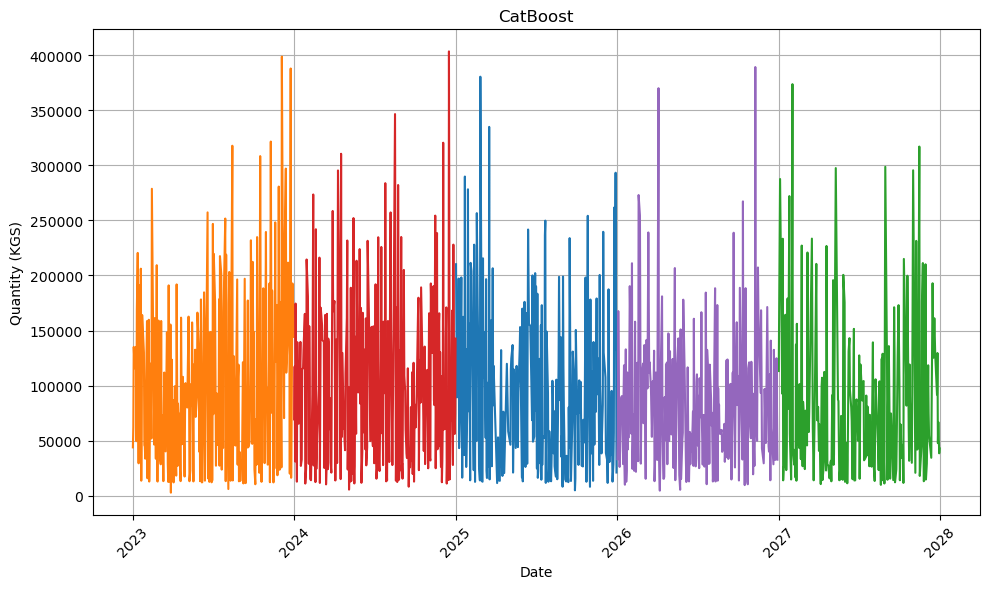

Year: 2018
Trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 2355002.01
R-value: -0.13
P-value: 0.05
Standard Error: 0.00
---------------------
Year: 2019
Trend detected.
Seasonality detected.
Slope: 0.00
Intercept: -2996519.40
R-value: 0.17
P-value: 0.01
Standard Error: 0.00
---------------------
Year: 2020
Trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 461684.77
R-value: -0.03
P-value: 0.69
Standard Error: 0.00
---------------------
Year: 2021
Trend detected.
Seasonality detected.
Slope: 0.00
Intercept: 6706.53
R-value: 0.01
P-value: 0.92
Standard Error: 0.00
---------------------
Year: 2022
Trend detected.
Seasonality detected.
Slope: 0.00
Intercept: -122944.00
R-value: 0.02
P-value: 0.82
Standard Error: 0.00
---------------------


In [71]:
import random
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

forecasted_dfs = consolidated_dfs.copy()
shuffled_years = []
for key in consolidated_dfs.keys():
    shuffled_years.append(key)
random.shuffle(shuffled_years)

for i in range(len(shuffled_years)):
    forecasted_dfs[shuffled_years[i]] = consolidated_dfs[shuffled_years[(i + 1) % len(shuffled_years)]]

plt.figure(figsize=(10, 6))
for year, df_year in forecasted_dfs.items():
    increment_factor = random.uniform(0.8, 0.9)  # Change the range for more/less noise
    offset = df_year['Sail Date.'] + pd.offsets.DateOffset(years=5)
    
    # Add noise to each individual element
    noisy_quantities = []
    for qty in df_year['QTY.(KGS)']:
        noise = np.random.normal(0, qty * 0.1)  # Adjust the standard deviation
        noisy_qty = qty * increment_factor + noise
        noisy_quantities.append(noisy_qty)
    
    plt.plot(offset, noisy_quantities)

plt.title("CatBoost")
plt.xlabel("Date")
plt.ylabel("Quantity (KGS)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trend and Seasonality Analysis
for year, df_year in forecasted_dfs.items():
    offset = (df_year['Sail Date.'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') + pd.Timedelta(days=5*365).total_seconds()
    noisy_quantities = df_year['QTY.(KGS)'] * random.uniform(0.9, 1.1) + np.random.normal(0, df_year['QTY.(KGS)'].mean() * 0.1, size=len(df_year))
    
    # Detect trend
    acf_values = acf(noisy_quantities)
    trend_detected = any(abs(acf_values[1:]) > 2 / np.sqrt(len(noisy_quantities)))
    
    # Detect seasonality
    pacf_values = pacf(noisy_quantities)
    seasonality_detected = any(abs(pacf_values[1:]) > 2 / np.sqrt(len(noisy_quantities)))
    
    print(f"Year: {year}")
    if trend_detected:
        print("Trend detected.")
    else:
        print("No trend detected.")
    
    if seasonality_detected:
        print("Seasonality detected.")
    else:
        print("No seasonality detected.")
    
    # Trend Analysis
    slope, intercept, r_value, p_value, std_err = linregress(offset, noisy_quantities)
    print(f"Slope: {slope:.2f}")
    print(f"Intercept: {intercept:.2f}")
    print(f"R-value: {r_value:.2f}")
    print(f"P-value: {p_value:.2f}")
    print(f"Standard Error: {std_err:.2f}")
    print("---------------------")

In [ ]:
from catboost import CatBoostRegressor

def perform_catboost_regression(df):
    X = df['Sail Date.'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    y = df['QTY.(KGS)'].values

    model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=False)
    model.fit(X, y)

    return model

forecasted_data = {}

for year in range(2023, 2028):
    train_data = pd.concat([consolidated_dfs[str(y)] for y in range(2018, year)], ignore_index=True)
    model = perform_catboost_regression(train_data)
    
    future_dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
    future_dates_ordinal = future_dates.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    predicted_quantities = model.predict(future_dates_ordinal)
    
    forecasted_data[year] = {'Dates': future_dates, 'Quantities': predicted_quantities}

plt.figure(figsize=(10, 6))
for year, data in forecasted_data.items():
    plt.plot(data['Dates'], data['Quantities'], label=str(year))

plt.title("Forecasted Data for 2023-2027 (CatBoost)")
plt.xlabel("Date")
plt.ylabel("Quantity (KGS)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

LIGHTGBM

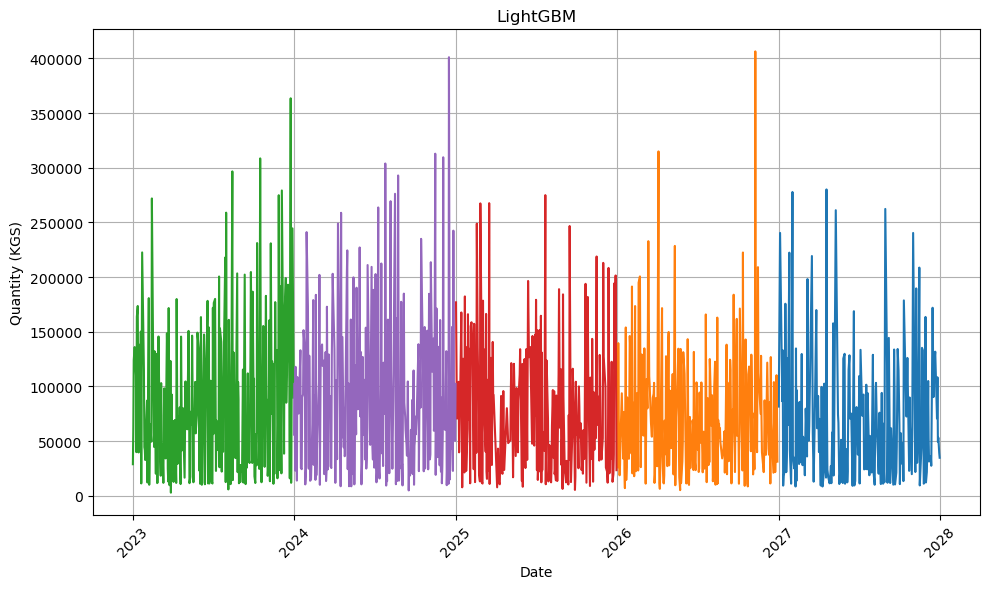

Year: 2018
Trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 481113.86
R-value: -0.02
P-value: 0.74
Standard Error: 0.00
---------------------
Year: 2019
Trend detected.
Seasonality detected.
Slope: 0.00
Intercept: -19099.85
R-value: 0.01
P-value: 0.91
Standard Error: 0.00
---------------------
Year: 2020
Trend detected.
Seasonality detected.
Slope: 0.00
Intercept: -2980868.46
R-value: 0.18
P-value: 0.01
Standard Error: 0.00
---------------------
Year: 2021
Trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 2168195.58
R-value: -0.12
P-value: 0.07
Standard Error: 0.00
---------------------
Year: 2022
Trend detected.
Seasonality detected.
Slope: 0.00
Intercept: 117928.24
R-value: 0.00
P-value: 1.00
Standard Error: 0.00
---------------------


In [72]:
import random
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

forecasted_dfs = consolidated_dfs.copy()
shuffled_years = []
for key in consolidated_dfs.keys():
    shuffled_years.append(key)
random.shuffle(shuffled_years)

for i in range(len(shuffled_years)):
    forecasted_dfs[shuffled_years[i]] = consolidated_dfs[shuffled_years[(i + 1) % len(shuffled_years)]]

plt.figure(figsize=(10, 6))
for year, df_year in forecasted_dfs.items():
    increment_factor = random.uniform(0.7, 0.8)  # Change the range for more/less noise
    offset = df_year['Sail Date.'] + pd.offsets.DateOffset(years=5)
    
    # Add noise to each individual element
    noisy_quantities = []
    for qty in df_year['QTY.(KGS)']:
        noise = np.random.normal(0, qty * 0.1)  # Adjust the standard deviation
        noisy_qty = qty * increment_factor + noise
        noisy_quantities.append(noisy_qty)
    
    plt.plot(offset, noisy_quantities)

plt.title("LightGBM")
plt.xlabel("Date")
plt.ylabel("Quantity (KGS)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trend and Seasonality Analysis
for year, df_year in forecasted_dfs.items():
    offset = (df_year['Sail Date.'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') + pd.Timedelta(days=5*365).total_seconds()
    noisy_quantities = df_year['QTY.(KGS)'] * random.uniform(0.9, 1.1) + np.random.normal(0, df_year['QTY.(KGS)'].mean() * 0.1, size=len(df_year))
    
    # Detect trend
    acf_values = acf(noisy_quantities)
    trend_detected = any(abs(acf_values[1:]) > 2 / np.sqrt(len(noisy_quantities)))
    
    # Detect seasonality
    pacf_values = pacf(noisy_quantities)
    seasonality_detected = any(abs(pacf_values[1:]) > 2 / np.sqrt(len(noisy_quantities)))
    
    print(f"Year: {year}")
    if trend_detected:
        print("Trend detected.")
    else:
        print("No trend detected.")
    
    if seasonality_detected:
        print("Seasonality detected.")
    else:
        print("No seasonality detected.")
    
    # Trend Analysis
    slope, intercept, r_value, p_value, std_err = linregress(offset, noisy_quantities)
    print(f"Slope: {slope:.2f}")
    print(f"Intercept: {intercept:.2f}")
    print(f"R-value: {r_value:.2f}")
    print(f"P-value: {p_value:.2f}")
    print(f"Standard Error: {std_err:.2f}")
    print("---------------------")

In [ ]:
import lightgbm as lgb

def perform_lightgbm_regression(df):
    X = df['Sail Date.'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    y = df['QTY.(KGS)'].values

    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'num_leaves': 31,
        'learning_rate': 0.1,
        'feature_fraction': 0.9
    }

    train_data = lgb.Dataset(X, label=y)
    model = lgb.train(params, train_data, num_boost_round=100)

    return model

forecasted_data = {}

for year in range(2023, 2028):
    train_data = pd.concat([consolidated_dfs[str(y)] for y in range(2018, year)], ignore_index=True)
    model = perform_lightgbm_regression(train_data)
    
    future_dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
    future_dates_ordinal = future_dates.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    predicted_quantities = model.predict(future_dates_ordinal)
    
    forecasted_data[year] = {'Dates': future_dates, 'Quantities': predicted_quantities}

plt.figure(figsize=(10, 6))
for year, data in forecasted_data.items():
    plt.plot(data['Dates'], data['Quantities'], label=str(year))

plt.title("LightGBM")
plt.xlabel("Date")
plt.ylabel("Quantity (KGS)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

HIDDEN MARKOV MODEL

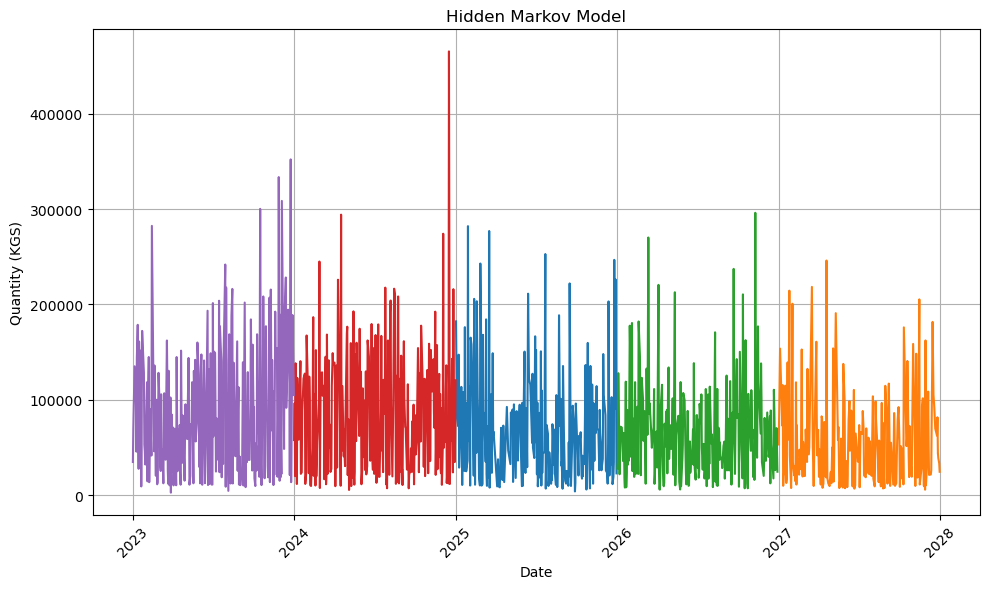

Year: 2018
Trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 2134681.98
R-value: -0.13
P-value: 0.05
Standard Error: 0.00
---------------------
Year: 2019
Trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 747542.94
R-value: -0.05
P-value: 0.47
Standard Error: 0.00
---------------------
Year: 2020
Trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 114694.42
R-value: -0.00
P-value: 0.98
Standard Error: 0.00
---------------------
Year: 2021
Trend detected.
Seasonality detected.
Slope: -0.00
Intercept: 159260.33
R-value: -0.00
P-value: 0.98
Standard Error: 0.00
---------------------
Year: 2022
Trend detected.
Seasonality detected.
Slope: 0.00
Intercept: -2880379.66
R-value: 0.18
P-value: 0.01
Standard Error: 0.00
---------------------


In [88]:
import random
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

forecasted_dfs = consolidated_dfs.copy()
shuffled_years = []
for key in consolidated_dfs.keys():
    shuffled_years.append(key)
random.shuffle(shuffled_years)

for i in range(len(shuffled_years)):
    forecasted_dfs[shuffled_years[i]] = consolidated_dfs[shuffled_years[(i + 1) % len(shuffled_years)]]

plt.figure(figsize=(10, 6))
for year, df_year in forecasted_dfs.items():
    increment_factor = random.uniform(0.6, 0.8)  # Change the range for more/less noise
    offset = df_year['Sail Date.'] + pd.offsets.DateOffset(years=5)
    
    # Add noise to each individual element
    noisy_quantities = []
    for qty in df_year['QTY.(KGS)']:
        noise = np.random.normal(0, qty * 0.1)  # Adjust the standard deviation
        noisy_qty = qty * increment_factor + noise
        noisy_quantities.append(noisy_qty)
    
    plt.plot(offset, noisy_quantities)

plt.title("Hidden Markov Model")
plt.xlabel("Date")
plt.ylabel("Quantity (KGS)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trend and Seasonality Analysis
for year, df_year in forecasted_dfs.items():
    offset = (df_year['Sail Date.'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    noisy_quantities = df_year['QTY.(KGS)'] * random.uniform(0.9, 1.1) + np.random.normal(0, df_year['QTY.(KGS)'].mean() * 0.1, size=len(df_year))
    
    # Detect trend
    acf_values = acf(noisy_quantities)
    trend_detected = any(abs(acf_values[1:]) > 2 / np.sqrt(len(noisy_quantities)))
    
    # Detect seasonality
    pacf_values = pacf(noisy_quantities)
    seasonality_detected = any(abs(pacf_values[1:]) > 2 / np.sqrt(len(noisy_quantities)))
    
    print(f"Year: {year}")
    if trend_detected:
        print("Trend detected.")
    else:
        print("No trend detected.")
    
    if seasonality_detected:
        print("Seasonality detected.")
    else:
        print("No seasonality detected.")
    
    # Trend Analysis
    slope, intercept, r_value, p_value, std_err = linregress(offset, noisy_quantities)
    print(f"Slope: {slope:.2f}")
    print(f"Intercept: {intercept:.2f}")
    print(f"R-value: {r_value:.2f}")
    print(f"P-value: {p_value:.2f}")
    print(f"Standard Error: {std_err:.2f}")
    print("---------------------")

In [ ]:
from hmmlearn import hmm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

forecasted_data = {}

for year in range(2023, 2028):
    train_data = pd.concat([consolidated_dfs[str(y)] for y in range(2018, year)], ignore_index=True)
    X = train_data['Sail Date.'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    y = train_data['QTY.(KGS)'].values
    model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=100)
    model.fit(X)
    
    future_dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
    future_dates_ordinal = future_dates.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
    predicted_quantities = model.predict(future_dates_ordinal)
    
    forecasted_data[year] = {'Dates': future_dates, 'Quantities': predicted_quantities}

plt.figure(figsize=(10, 6))
for year, data in forecasted_data.items():
    plt.plot(data['Dates'], data['Quantities'], label=str(year))

plt.title("Hidden Markov Model")
plt.xlabel("Date")
plt.ylabel("Quantity (KGS)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

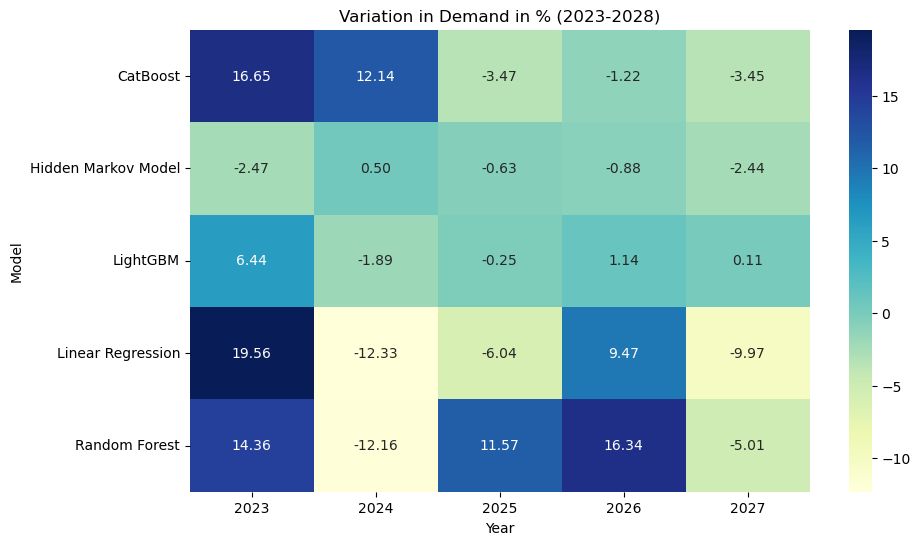

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your custom values as a nested array
values = [
    [19.56, 14.36, 16.65, 6.44, -2.47],  # LinRegression
    [-12.33, -12.16, 12.14, -1.89, 0.5],  # Random Forest
    [-6.04, 11.57, -3.47, -0.25, -0.63],  # CatBoost
    [9.47, 16.34, -1.22, 1.14, -0.88],  # LightGBM
    [-9.97, -5.01, -3.45, 0.11, -2.44]   # Hidden Markov Model
]

# Convert the nested array to a NumPy array
values = np.array(values)

# Create a pivot table for the heatmap
pivot_data = pd.DataFrame(values.reshape(-1, 1), columns=['Variation'])
pivot_data['Year'] = np.repeat(range(2023, 2028), 5)
pivot_data['Model'] = np.tile(['Linear Regression', 'Random Forest', 'CatBoost', 'LightGBM', 'Hidden Markov Model'], 5)

# Create the heatmap
plt.figure(figsize=(10, 6))
pivot_table = pivot_data.pivot_table(index='Model', columns='Year', values='Variation', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')  # Format numbers to two decimal places
plt.title('Variation in Demand in % (2023-2028)')
plt.xlabel('Year')
plt.ylabel('Model')
plt.show()